In [439]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import describe
from sklearn import linear_model
from scipy.stats import linregress


Importing and reading the csv file

In [440]:
spotify_file = "Resources\spotify_clean.csv"
spotify_df = pd.read_csv(spotify_file)
spotify_df.head()

,track_name,album_popularity,artist_name,artist_followers,artist_popularity,artist_genres,rank,week,danceability,energy,acousticness,liveness,tempo,duration,streams,genre_category
0,Starboy,0,The Weeknd,51215861,94,"canadian contemporary r&b, canadian pop, pop",1,1/6/2017,0.681,0.594,0.1650,0.134,186.054,230453,25734078,International
1,Closer,71,The Chainsmokers,19562506,81,"dance pop, edm, electropop, pop, pop dance, tr...",2,1/6/2017,0.748,0.524,0.4140,0.111,95.010,244960,23519705,Dance
2,Rockabye (feat. Sean Paul & Anne-Marie),62,Clean Bandit,4943046,76,"dance pop, edm, pop, pop dance, post-teen pop,...",3,1/6/2017,0.720,0.763,0.4060,0.180,101.965,251088,21216399,Dance
3,Let Me Love You,0,DJ Snake,8137850,78,"dance pop, edm, electronic trap, pop, pop danc...",4,1/6/2017,0.476,0.718,0.0784,0.122,199.864,205946,19852704,Dance
4,I Don’t Wanna Live Forever (Fifty Shades Darke...,0,ZAYN,21433236,77,"dance pop, pop, post-teen pop, uk pop",5,1/6/2017,0.735,0.451,0.0631,0.325,117.973,245200,18316326,Dance


In [441]:
#originally we were looking at artist followers - so I sorted by artist followers!

spotify_df.sort_values(["artist_followers"])

,track_name,album_popularity,artist_name,artist_followers,artist_popularity,artist_genres,rank,week,danceability,energy,acousticness,liveness,tempo,duration,streams,genre_category
9287,Jingle Bell Rock,0,Anita Kerr Singers,3230,30,easy listening,108,12/8/2017,0.741,0.326,0.918,0.0658,120.992,130266,5464411,Other
9467,Jingle Bell Rock,0,Anita Kerr Singers,3230,30,easy listening,88,12/15/2017,0.741,0.326,0.918,0.0658,120.992,130266,6194483,Other
9158,Jingle Bell Rock,0,Anita Kerr Singers,3230,30,easy listening,179,12/1/2017,0.741,0.326,0.918,0.0658,120.992,130266,3546967,Other
9775,Carol of the Bells,53,Mykola Dmytrovych Leontovych,3300,44,"post-romantic era, ukrainian classical",197,12/22/2017,0.418,0.106,0.994,0.1790,46.718,85266,4122650,Other
9881,Carol of the Bells,53,Mykola Dmytrovych Leontovych,3300,44,"post-romantic era, ukrainian classical",104,12/29/2017,0.418,0.106,0.994,0.1790,46.718,85266,5979609,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27347,Photograph,61,Ed Sheeran,104059839,90,"pop, uk pop",192,8/30/2019,0.614,0.379,0.607,0.0986,107.989,258986,4404628,International
19138,Thinking out Loud,61,Ed Sheeran,104059839,90,"pop, uk pop",170,11/16/2018,0.781,0.445,0.474,0.1840,78.998,281560,4625597,International
43667,Afterglow,63,Ed Sheeran,104059839,90,"pop, uk pop",134,4/2/2021,0.641,0.324,0.698,0.3280,110.184,185486,5945567,International
43048,Perfect,84,Ed Sheeran,104059839,90,"pop, uk pop",115,3/12/2021,0.599,0.448,0.163,0.1060,95.050,263400,6296246,International


In [442]:
# changed to focus on the track_name 
#  set the index to the track name
pop_data = spotify_df.set_index('track_name')
pop_data.head()



,album_popularity,artist_name,artist_followers,artist_popularity,artist_genres,rank,week,danceability,energy,acousticness,liveness,tempo,duration,streams,genre_category
track_name,,,,,,,,,,,,,,,
Starboy,0,The Weeknd,51215861,94,"canadian contemporary r&b, canadian pop, pop",1,1/6/2017,0.681,0.594,0.1650,0.134,186.054,230453,25734078,International
Closer,71,The Chainsmokers,19562506,81,"dance pop, edm, electropop, pop, pop dance, tr...",2,1/6/2017,0.748,0.524,0.4140,0.111,95.010,244960,23519705,Dance
Rockabye (feat. Sean Paul & Anne-Marie),62,Clean Bandit,4943046,76,"dance pop, edm, pop, pop dance, post-teen pop,...",3,1/6/2017,0.720,0.763,0.4060,0.180,101.965,251088,21216399,Dance
Let Me Love You,0,DJ Snake,8137850,78,"dance pop, edm, electronic trap, pop, pop danc...",4,1/6/2017,0.476,0.718,0.0784,0.122,199.864,205946,19852704,Dance
"I Don’t Wanna Live Forever (Fifty Shades Darker) - From ""Fifty Shades Darker (Original Motion Picture Soundtrack)""",0,ZAYN,21433236,77,"dance pop, pop, post-teen pop, uk pop",5,1/6/2017,0.735,0.451,0.0631,0.325,117.973,245200,18316326,Dance


In [443]:
#Making an aggregate dataframe to plot
#adding a column to the dataframe to change the duration of the song from Milliseconds to Minutes

pop_data_t = pd.DataFrame(pop_data.groupby(["track_name"]).agg({"tempo":"mean", "genre_category":"max", "streams":"mean", "duration":"mean", "energy":"mean", "danceability":"mean", "liveness":"mean", "acousticness":"mean", }))
durationmin = [pop_data_t["duration"]/60000]
#**TRYING TO ADD A COLUMN to the dataframe that has the duration in minutes**
#pop_data_t.insert(-1, "durationmin", [pop_data_t["duration"]/60000])
pop_data_t.head()

,tempo,genre_category,streams,duration,energy,danceability,liveness,acousticness
track_name,,,,,,,,
!,119.961000,Hip-Hop,4.401357e+06,135338.000000,0.543000,0.725000,0.177000,0.029600
#AD?,175.896000,International,4.822940e+06,161748.000000,0.503000,0.660000,0.130000,0.131000
$$$ - with Matt Ox,140.067000,Hip-Hop,6.443057e+06,130403.000000,0.507000,0.774000,0.138000,0.063600
'Till I Collapse,171.412333,Hip-Hop,3.431727e+06,297889.037037,0.850852,0.550889,0.078519,0.074333
...Ready For It?,160.035684,Pop,7.162460e+06,208194.210526,0.768579,0.615000,0.170789,0.056332


In [444]:
#changing the duration column from duration in milliseconds to duration in minutes

pop_data_t.duration = pop_data_t.duration / 60000

pop_data_t.head()



,tempo,genre_category,streams,duration,energy,danceability,liveness,acousticness
track_name,,,,,,,,
!,119.961000,Hip-Hop,4.401357e+06,2.255633,0.543000,0.725000,0.177000,0.029600
#AD?,175.896000,International,4.822940e+06,2.695800,0.503000,0.660000,0.130000,0.131000
$$$ - with Matt Ox,140.067000,Hip-Hop,6.443057e+06,2.173383,0.507000,0.774000,0.138000,0.063600
'Till I Collapse,171.412333,Hip-Hop,3.431727e+06,4.964817,0.850852,0.550889,0.078519,0.074333
...Ready For It?,160.035684,Pop,7.162460e+06,3.469904,0.768579,0.615000,0.170789,0.056332


In [445]:
#Mapping the colors to the genre_categories

pop_data_t["genre_category"].map({
    "Hip-Hop":"peru", 
    "International":"green",
    "Dance": "royalblue",
    "Pop": "darkviolet",
    "Rock": "saddlebrown",
    "Other": "maroon"
}).values


array(['peru', 'green', 'peru', ..., 'green', 'darkviolet', 'royalblue'],
      dtype=object)

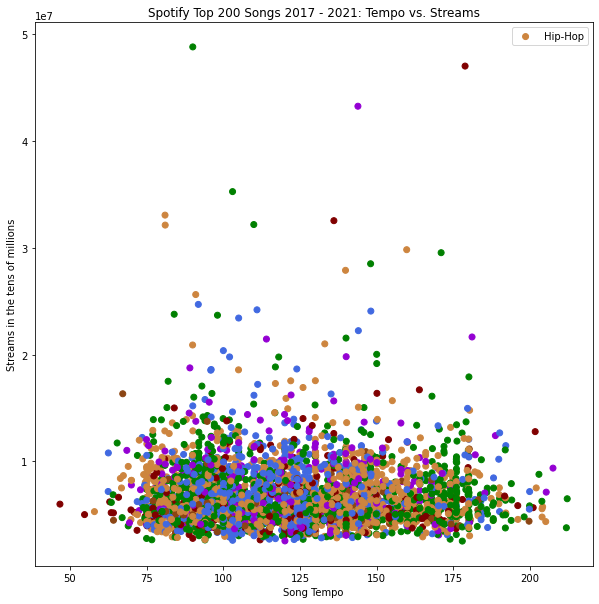

In [446]:
mygenres = ["Hip-Hop", "Dance", "International", "Pop", "Rock", "Other"]
mycolors = ["peru", "royalblue", "green", "darkviolet", "saddlebrown", "maroon"]

#plotting the Top 200 Songs - Tempo vs. Streams

plt.figure(figsize=(10,10))
plt.scatter(
    x=pop_data_t.tempo,
    y=pop_data_t.streams,
    c=pop_data_t["genre_category"].map({
        "Hip-Hop":"peru", 
        "International":"green",
        "Dance": "royalblue",
        "Pop": "darkviolet",
        "Rock": "saddlebrown",
        "Other": "maroon", 
    
    }).values,
);
plt.title("Spotify Top 200 Songs 2017 - 2021: Tempo vs. Streams")
plt.ylabel("Streams in the tens of millions")
plt.xlabel("Song Tempo")
plt.legend(pop_data_t["genre_category"])
plt.savefig("TopSongsTempoStreams.png")



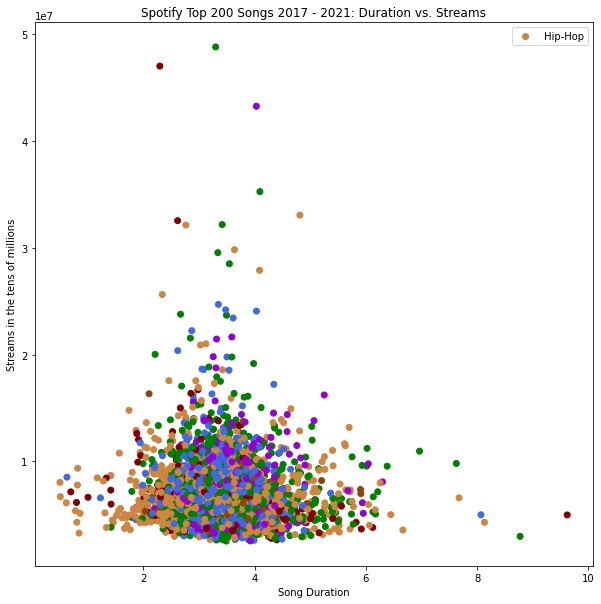

In [447]:
mygenres = ["Hip-Hop", "Dance", "International", "Pop", "Rock", "Other"]
mycolors = ["peru", "royalblue", "green", "darkviolet", "saddlebrown", "maroon"]

#plotting the Top 200 Songs - Duration vs. Streams

plt.figure(figsize=(10,10))
plt.scatter(
    x=pop_data_t.duration,
    y=pop_data_t.streams,
    c=pop_data_t["genre_category"].map({
        "Hip-Hop":"peru", 
        "International":"green",
        "Dance": "royalblue",
        "Pop": "darkviolet",
        "Rock": "saddlebrown",
        "Other": "maroon"
    }).values,
)
plt.title("Spotify Top 200 Songs 2017 - 2021: Duration vs. Streams")
plt.ylabel("Streams in the tens of millions")
plt.xlabel("Song Duration")
plt.legend(pop_data_t["genre_category"])
plt.savefig("TopSongsDurationStreams.png");

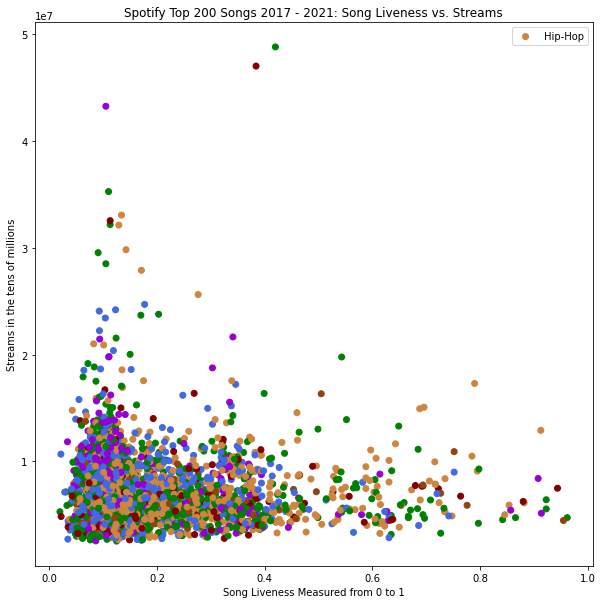

In [448]:
mygenres = ["Hip-Hop", "Dance", "International", "Pop", "Rock", "Other"]
mycolors = ["peru", "royalblue", "green", "darkviolet", "saddlebrown", "maroon"]

#plotting the Top 200 Songs in six genre categories - Liveness vs. Streams

plt.figure(figsize=(10,10))
plt.scatter(
    x=pop_data_t.liveness,
    y=pop_data_t.streams,
    c=pop_data_t["genre_category"].map({
        "Hip-Hop":"peru", 
        "International":"green",
        "Dance": "royalblue",
        "Pop": "darkviolet",
        "Rock": "saddlebrown",
        "Other": "maroon"
    }).values,
)
plt.title("Spotify Top 200 Songs 2017 - 2021: Song Liveness vs. Streams")
plt.ylabel("Streams in the tens of millions")
plt.xlabel("Song Liveness Measured from 0 to 1")
plt.legend(pop_data_t["genre_category"])
plt.savefig("TopSongsLivenessStreams.png");

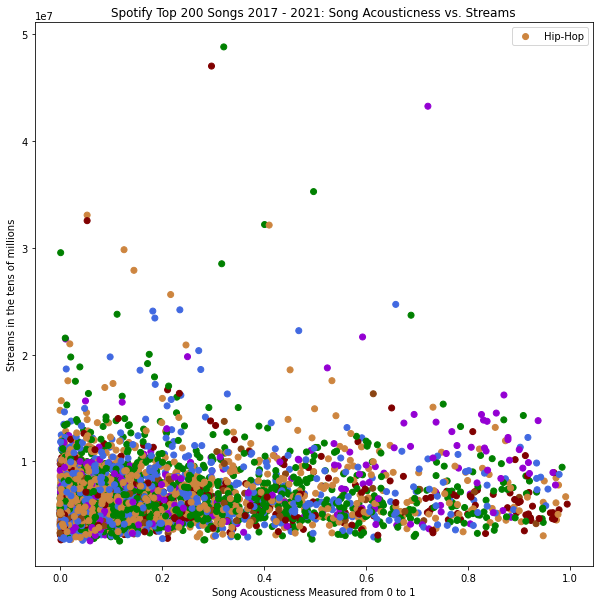

In [449]:
mygenres = ["Hip-Hop", "Dance", "International", "Pop", "Rock", "Other"]
mycolors = ["peru", "royalblue", "green", "darkviolet", "saddlebrown", "maroon"]

#plotting the Top 200 Songs in six genre categories - Acousticness vs. Streams

plt.figure(figsize=(10,10))
plt.scatter(
    x=pop_data_t.acousticness,
    y=pop_data_t.streams,
    c=pop_data_t["genre_category"].map({
        "Hip-Hop":"peru", 
        "International":"green",
        "Dance": "royalblue",
        "Pop": "darkviolet",
        "Rock": "saddlebrown",
        "Other": "maroon"
    }).values,
);
plt.title("Spotify Top 200 Songs 2017 - 2021: Song Acousticness vs. Streams")
plt.ylabel("Streams in the tens of millions")
plt.xlabel("Song Acousticness Measured from 0 to 1")
plt.legend(pop_data_t["genre_category"])
plt.savefig("TopSongsAcousticnessStreams.png");

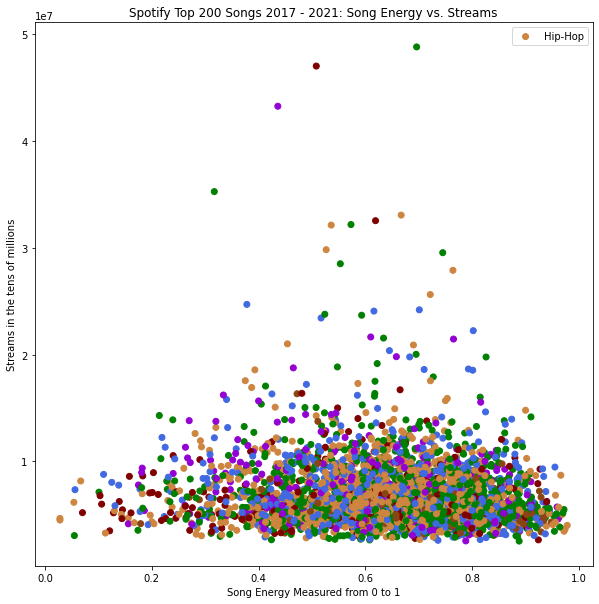

In [450]:
mygenres = ["Hip-Hop", "Dance", "International", "Pop", "Rock", "Other"]
mycolors = ["peru", "royalblue", "green", "darkviolet", "saddlebrown", "maroon"]

#plotting the Top 200 Songs in six genre categories - Energy vs. Streams

plt.figure(figsize=(10,10))
plt.scatter(
    x=pop_data_t.energy,
    y=pop_data_t.streams,
    c=pop_data_t["genre_category"].map({
        "Hip-Hop":"peru", 
        "International":"green",
        "Dance": "royalblue",
        "Pop": "darkviolet",
        "Rock": "saddlebrown",
        "Other": "maroon"
    }).values,
);
plt.title("Spotify Top 200 Songs 2017 - 2021: Song Energy vs. Streams")
plt.ylabel("Streams in the tens of millions")
plt.xlabel("Song Energy Measured from 0 to 1")
plt.legend(pop_data_t["genre_category"])
plt.savefig("TopSongsEnergyStreams.png");

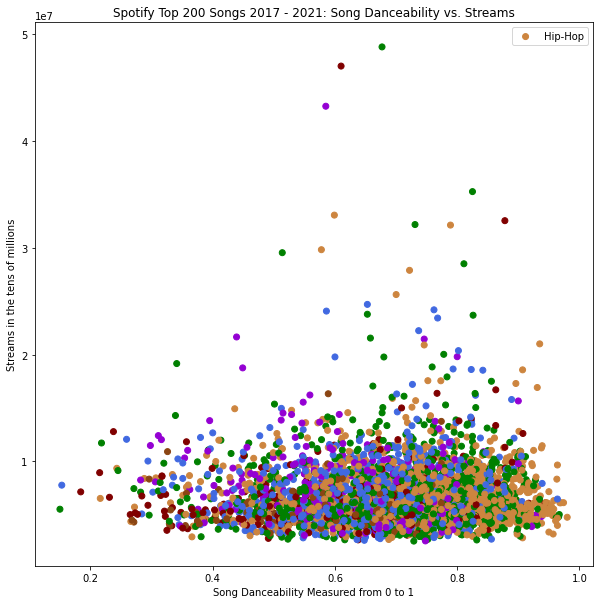

In [451]:
mygenres = ["Hip-Hop", "Dance", "International", "Pop", "Rock", "Other"]
mycolors = ["peru", "royalblue", "green", "darkviolet", "saddlebrown", "maroon"]

#plotting the Top 200 Songs in six genre categories - Danceability vs. Streams

plt.figure(figsize=(10,10))
plt.scatter(
    x=pop_data_t.danceability,
    y=pop_data_t.streams,
    c=pop_data_t["genre_category"].map({
        "Hip-Hop":"peru", 
        "International":"green",
        "Dance": "royalblue",
        "Pop": "darkviolet",
        "Rock": "saddlebrown",
        "Other": "maroon"
    }).values,
)
plt.title("Spotify Top 200 Songs 2017 - 2021: Song Danceability vs. Streams")
plt.ylabel("Streams in the tens of millions")
plt.xlabel("Song Danceability Measured from 0 to 1")
plt.legend(pop_data_t["genre_category"])
plt.savefig("TopSongsDanceabilityStreams.png");

In [452]:
#setting up a dataframe specific to Hip-Hop

Hip_Hop_t_df = pop_data_t.loc[pop_data_t["genre_category"] == "Hip-Hop"]

#print (Hip_Hop_t_df.head())
Hip_Hop_t_df.count()


tempo             1086
genre_category    1086
streams           1086
duration          1086
energy            1086
danceability      1086
liveness          1086
acousticness      1086
dtype: int64

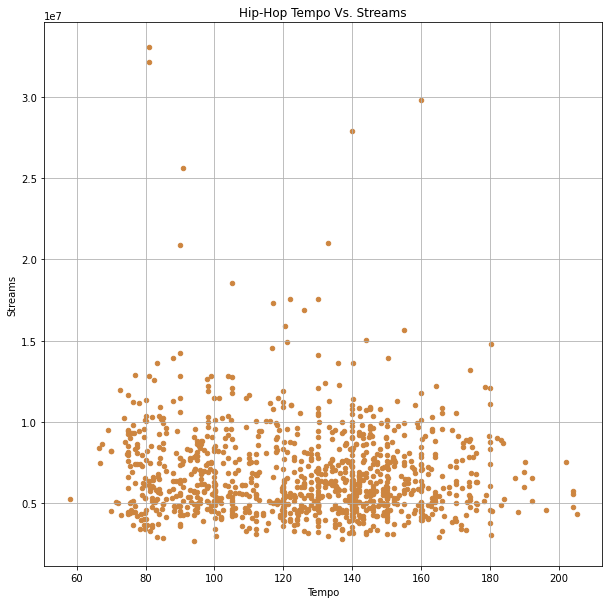

In [453]:
#Plotting Hip-Hop Tempo vs. Streams

Hip_Hop_t_df.plot(kind="scatter", x="tempo", y="streams", c="peru", grid=True, figsize=(10,10),
title="Hip-Hop Tempo Vs. Streams", xlabel = "Tempo", ylabel = "Streams")
plt.savefig("HipHopTempoStreams.png")

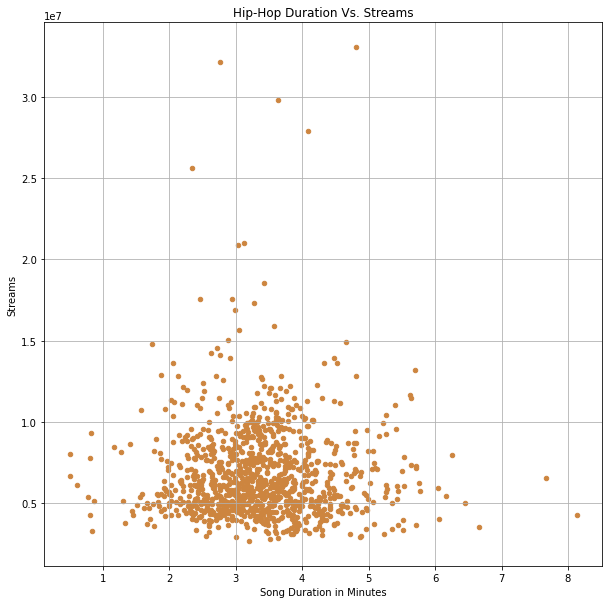

In [454]:
#Plotting Hip-Hop Duration vs. Streams

Hip_Hop_t_df.plot(kind="scatter", x="duration", y="streams", c="peru", grid=True, figsize=(10,10),
title="Hip-Hop Duration Vs. Streams", xlabel = "Song Duration in Minutes", ylabel = "Streams")
plt.savefig("HipHopDurationStreams.png")

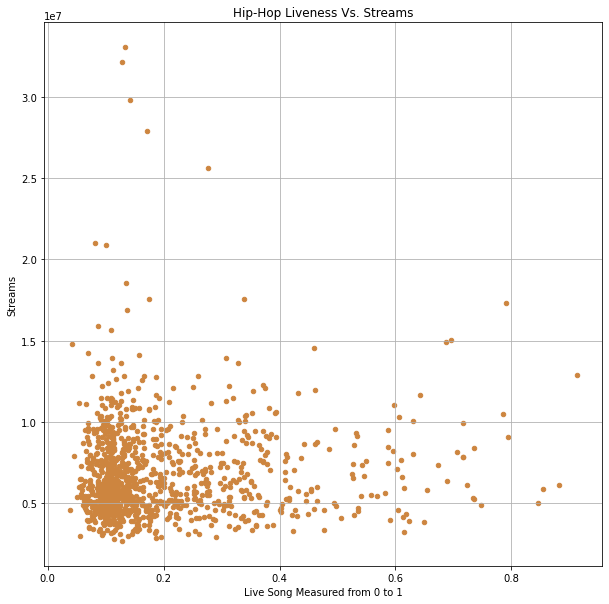

In [455]:
#Plotting Hip-Hop Liveness vs. Streams

Hip_Hop_t_df.plot(kind="scatter", x="liveness", y="streams", c="peru", grid=True, figsize=(10,10),
title="Hip-Hop Liveness Vs. Streams", xlabel = "Live Song Measured from 0 to 1", ylabel = "Streams")
plt.savefig("HipHopLivenessStreams.png")

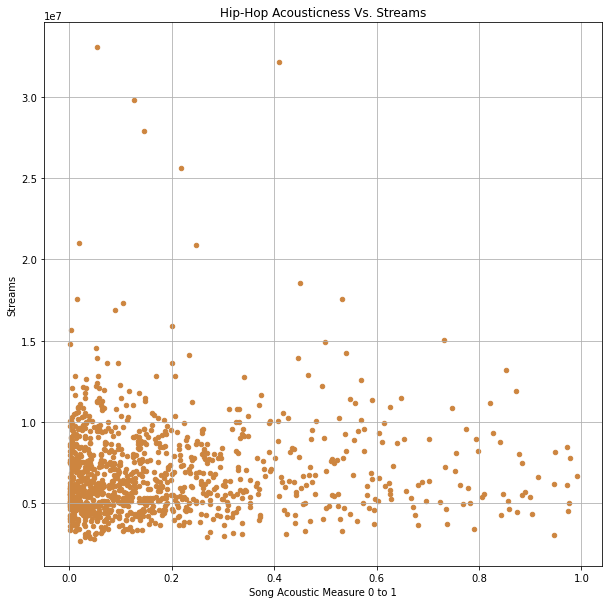

In [456]:
#Plotting Hip-Hop Acousticness vs. Streams

Hip_Hop_t_df.plot(kind="scatter", x="acousticness", y="streams", c="peru", grid=True, figsize=(10,10),
title="Hip-Hop Acousticness Vs. Streams", xlabel = "Song Acoustic Measure 0 to 1", ylabel = "Streams")
plt.savefig("HipHopAcousticnessStreams.png")

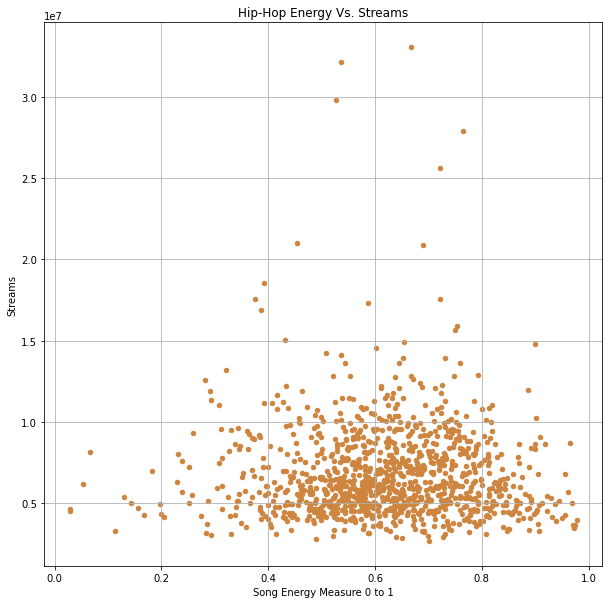

In [457]:
#Plotting Hip-Hop Energy vs. Streams

Hip_Hop_t_df.plot(kind="scatter", x="energy", y="streams", c="peru", grid=True, figsize=(10,10),
title="Hip-Hop Energy Vs. Streams", xlabel = "Song Energy Measure 0 to 1", ylabel = "Streams")
plt.savefig("HipHopEnergyStreams.png")

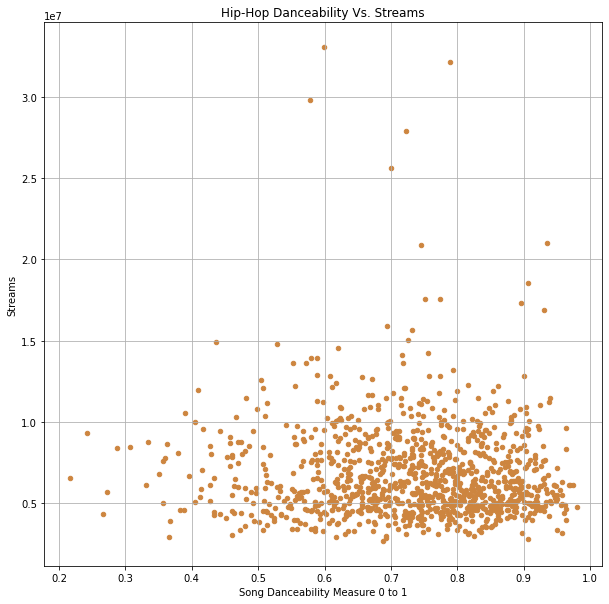

In [458]:
#Plotting Hip-Hop Danceability vs. Streams

Hip_Hop_t_df.plot(kind="scatter", x="danceability", y="streams", c="peru", grid=True, figsize=(10,10),
title="Hip-Hop Danceability Vs. Streams", xlabel = "Song Danceability Measure 0 to 1", ylabel = "Streams")
plt.savefig("HipHopDanceabilityStreams.png")

In [459]:
#Setting up an international dataframe to plot

International_t_df = pop_data_t.loc[pop_data_t["genre_category"] == "International"]

International_t_df.head()
International_t_df.count()


tempo             1089
genre_category    1089
streams           1089
duration          1089
energy            1089
danceability      1089
liveness          1089
acousticness      1089
dtype: int64

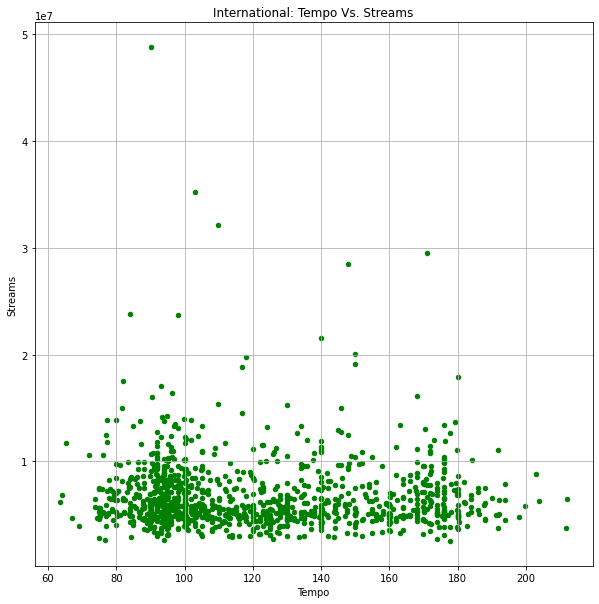

In [460]:
#Plotting International Music Tempo vs. Streams


International_t_df.plot(kind="scatter", x="tempo", y="streams", c="green", grid=True, figsize=(10,10),
title="International: Tempo Vs. Streams", xlabel = "Tempo", ylabel = "Streams")
plt.savefig("InternationalTempoStreams.png")

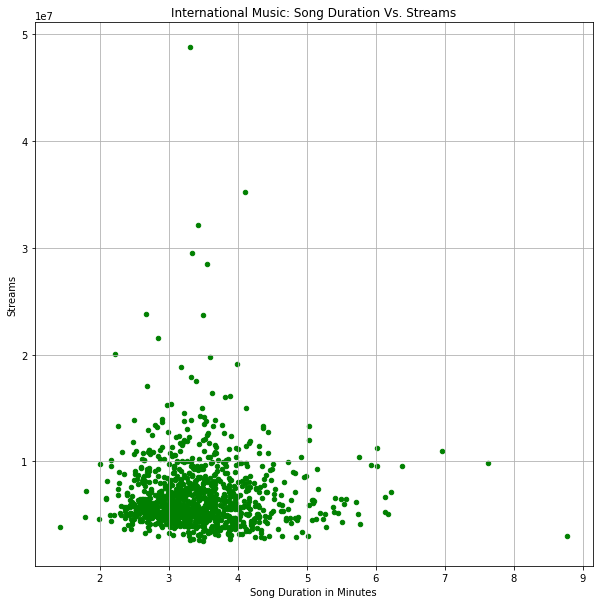

In [461]:
#Plotting International Music Duration vs. Streams


International_t_df.plot(kind="scatter", x="duration", y="streams", c="green", grid=True, figsize=(10,10),
title="International Music: Song Duration Vs. Streams", xlabel = "Song Duration in Minutes", ylabel = "Streams")
plt.savefig("InternationalDurationStreams.png")

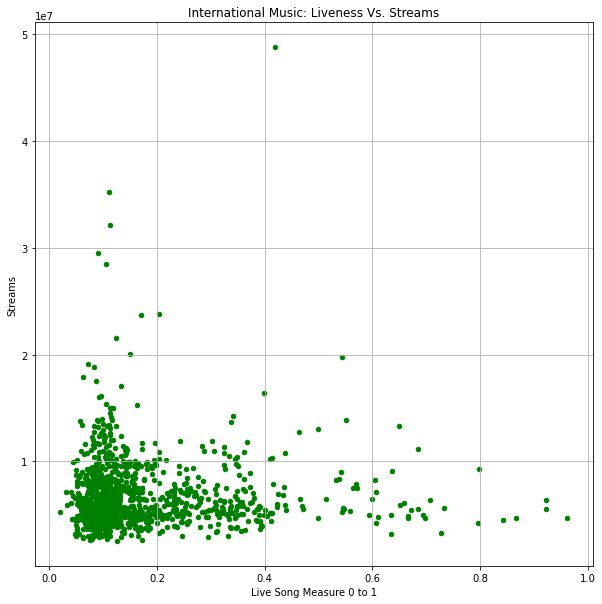

In [462]:
#Plotting International Music Liveness vs. Streams


International_t_df.plot(kind="scatter", x="liveness", y="streams", c="green", grid=True, figsize=(10,10),
title="International Music: Liveness Vs. Streams", xlabel = "Live Song Measure 0 to 1", ylabel = "Streams")

plt.savefig("InternationalLivenessStreams.png")

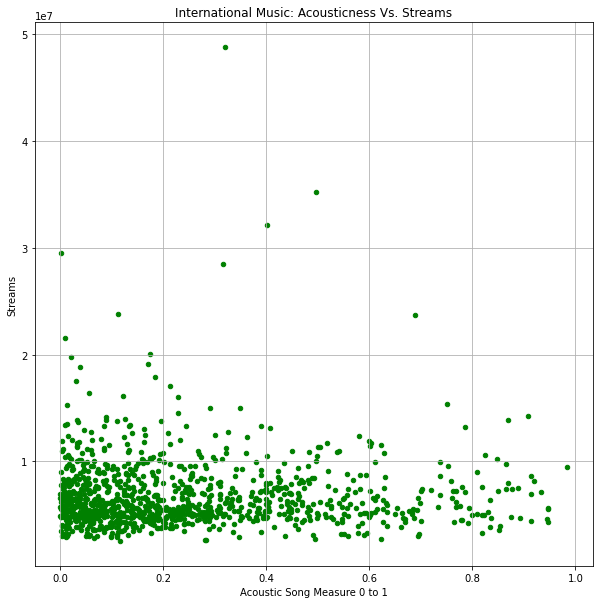

In [463]:
#Plotting International Music Acousticness vs. Streams


International_t_df.plot(kind="scatter", x="acousticness", y="streams", c="green", grid=True, figsize=(10,10),
title="International Music: Acousticness Vs. Streams", xlabel = "Acoustic Song Measure 0 to 1", ylabel = "Streams")

plt.savefig("InternationalAcousticnessStreams.png")

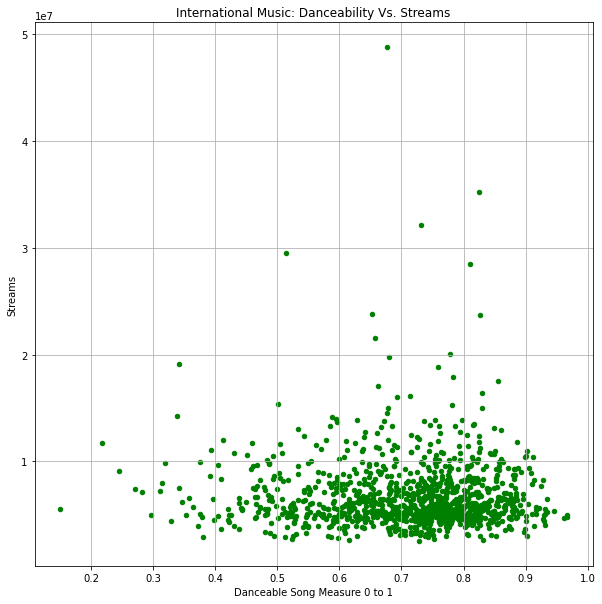

In [464]:
#Plotting International Music Danceability vs. Streams


International_t_df.plot(kind="scatter", x="danceability", y="streams", c="green", grid=True, figsize=(10,10),
title="International Music: Danceability Vs. Streams", xlabel = "Danceable Song Measure 0 to 1", ylabel = "Streams")
plt.savefig("InternationalDanceabilityStreams.png")

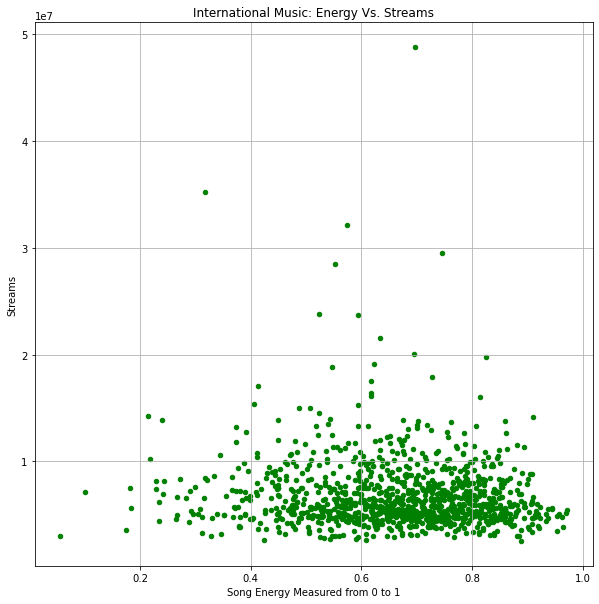

In [465]:
#Plotting International Music - Energy vs. Streams


International_t_df.plot(kind="scatter", x="energy", y="streams", c="green", grid=True, figsize=(10,10),
title="International Music: Energy Vs. Streams", xlabel = "Song Energy Measured from 0 to 1", ylabel = "Streams")
plt.savefig("InternationalEnergyStreams.png")

In [466]:
#Setting up a dataframe for dance music

Dance_t_df = pop_data_t.loc[pop_data_t["genre_category"] == "Dance"]

Dance_t_df.head()
Dance_t_df.count()

tempo             669
genre_category    669
streams           669
duration          669
energy            669
danceability      669
liveness          669
acousticness      669
dtype: int64

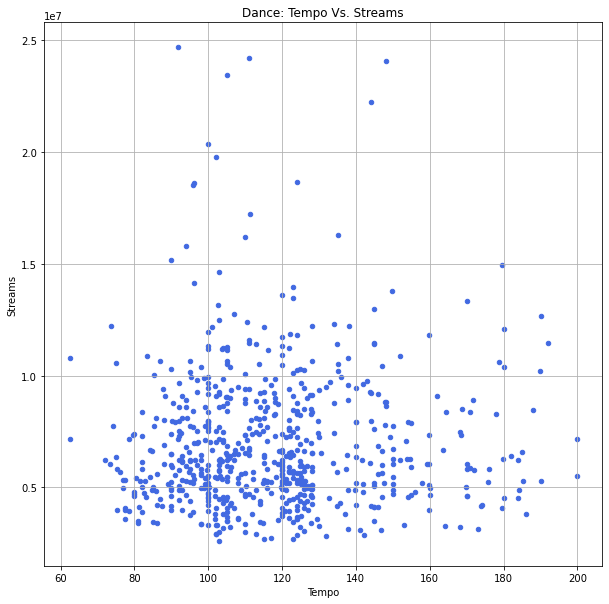

In [467]:
#Plotting Dance Music Tempo vs. Streams

Dance_t_df.plot(kind="scatter", x="tempo", y="streams", c="royalblue", grid=True, figsize=(10,10),
title="Dance: Tempo Vs. Streams", xlabel = "Tempo", ylabel = "Streams");


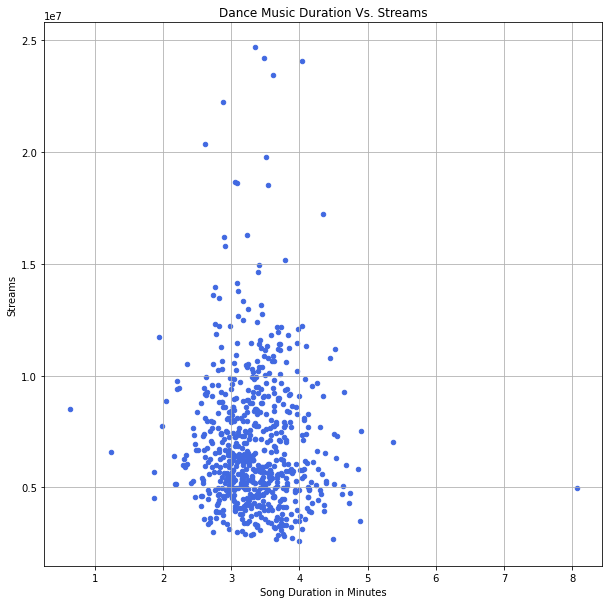

In [468]:
#Plotting Dance Music Duration vs. Streams


Dance_t_df.plot(kind="scatter", x="duration", y="streams", c="royalblue", grid=True, figsize=(10,10),
title="Dance Music Duration Vs. Streams", xlabel = "Song Duration in Minutes", ylabel = "Streams");

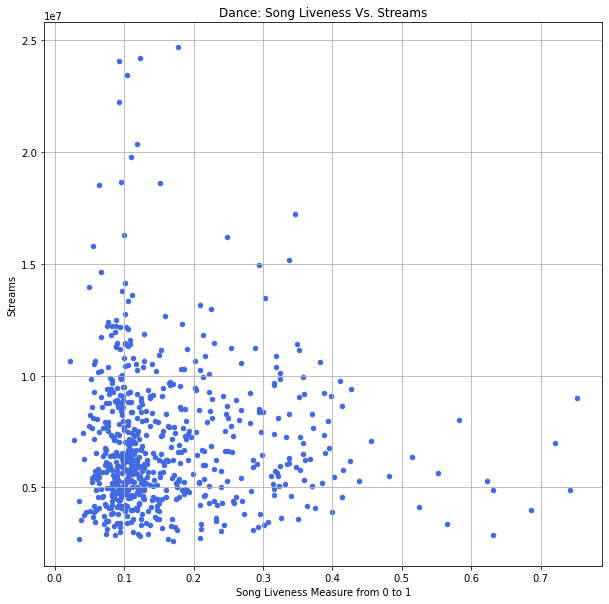

In [469]:
#Plotting Dance Music Liveness vs. Streams

Dance_t_df.plot(kind="scatter", x="liveness", y="streams", c="royalblue", grid=True, figsize=(10,10),
title="Dance: Song Liveness Vs. Streams", xlabel = "Song Liveness Measure from 0 to 1", ylabel = "Streams");

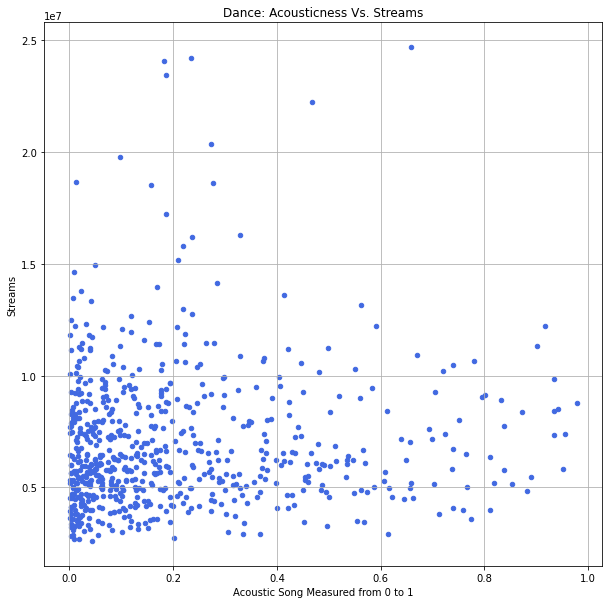

In [470]:
#Plotting Dance Music Acousticness vs. Streams

Dance_t_df.plot(kind="scatter", x="acousticness", y="streams", c="royalblue", grid=True, figsize=(10,10),
title="Dance: Acousticness Vs. Streams", xlabel = "Acoustic Song Measured from 0 to 1", ylabel = "Streams");

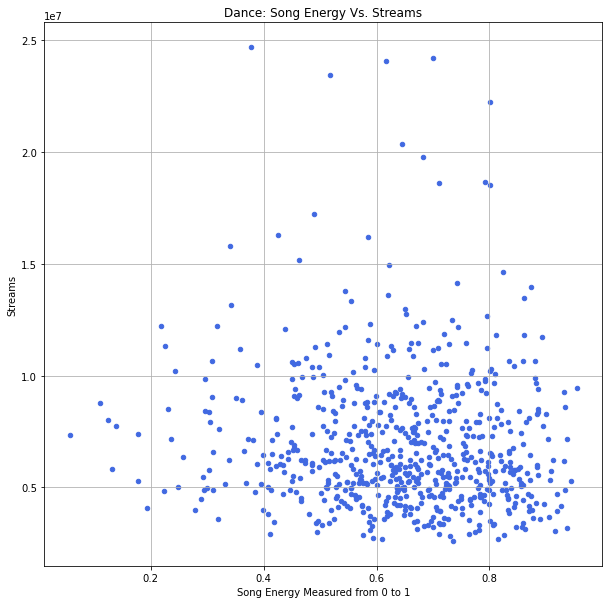

In [471]:
#Plotting Dance Music Energy vs. Streams

Dance_t_df.plot(kind="scatter", x="energy", y="streams", c="royalblue", grid=True, figsize=(10,10),
title="Dance: Song Energy Vs. Streams", xlabel = "Song Energy Measured from 0 to 1", ylabel = "Streams");

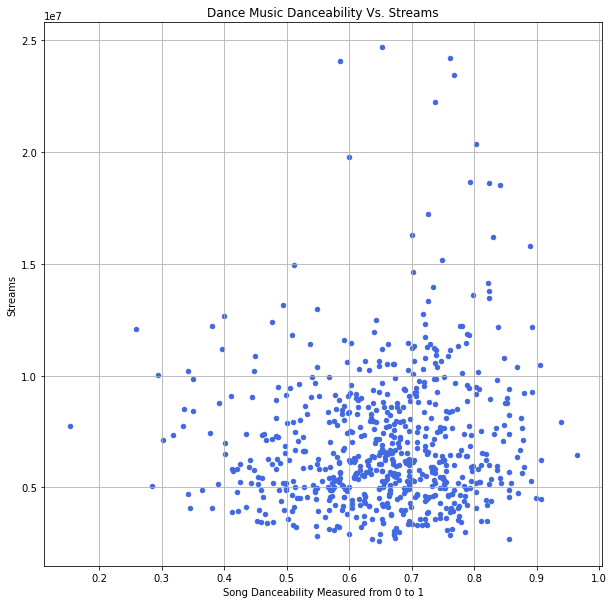

In [472]:
#Plotting Dance Music Danceability vs. Streams


Dance_t_df.plot(kind="scatter", x="danceability", y="streams", c="royalblue", grid=True, figsize=(10,10),
title="Dance Music Danceability Vs. Streams", xlabel = "Song Danceability Measured from 0 to 1", ylabel = "Streams");

In [473]:
#Setting up a Pop dataframe to plot

Pop_t_df = pop_data_t.loc[pop_data_t["genre_category"] == "Pop"]

Pop_t_df.head()
Pop_t_df.count()

tempo             306
genre_category    306
streams           306
duration          306
energy            306
danceability      306
liveness          306
acousticness      306
dtype: int64

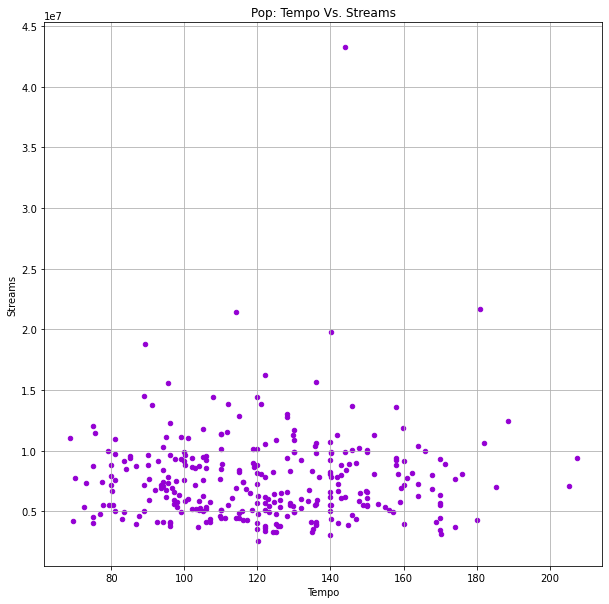

In [474]:
#Plotting Pop Music Tempo vs. Streams

Pop_t_df.plot(kind="scatter", x="tempo", y="streams", c="darkviolet", grid=True, figsize=(10,10),
title="Pop: Tempo Vs. Streams", xlabel = "Tempo", ylabel = "Streams");

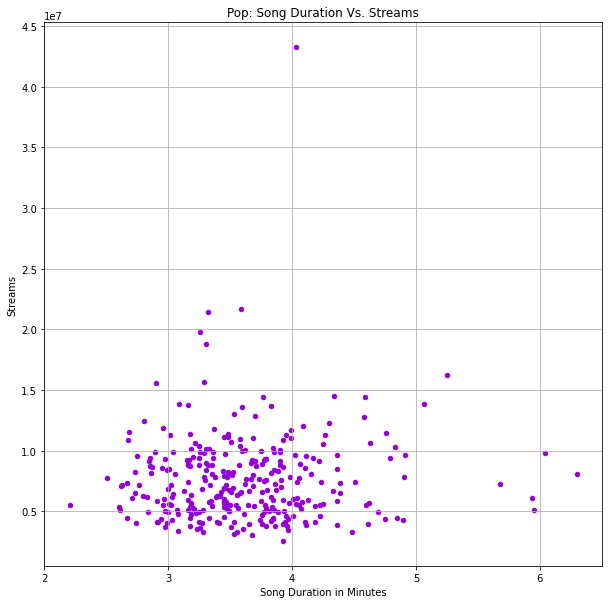

In [475]:
#Plotting Pop Music Duration vs. Streams

Pop_t_df.plot(kind="scatter", x="duration", y="streams", c="darkviolet", grid=True, figsize=(10,10),
title="Pop: Song Duration Vs. Streams", xlabel = "Song Duration in Minutes", ylabel = "Streams");

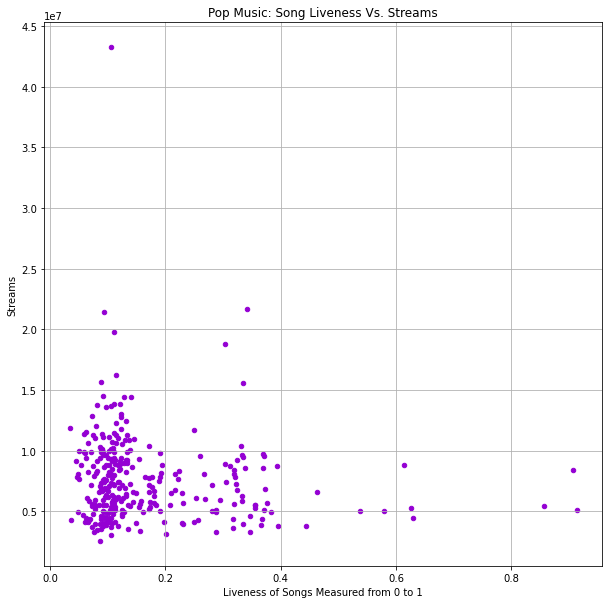

In [476]:
#Plotting Pop Music Liveness vs. Streams


Pop_t_df.plot(kind="scatter", x="liveness", y="streams", c="darkviolet", grid=True, figsize=(10,10),
title="Pop Music: Song Liveness Vs. Streams", xlabel = "Liveness of Songs Measured from 0 to 1", ylabel = "Streams");

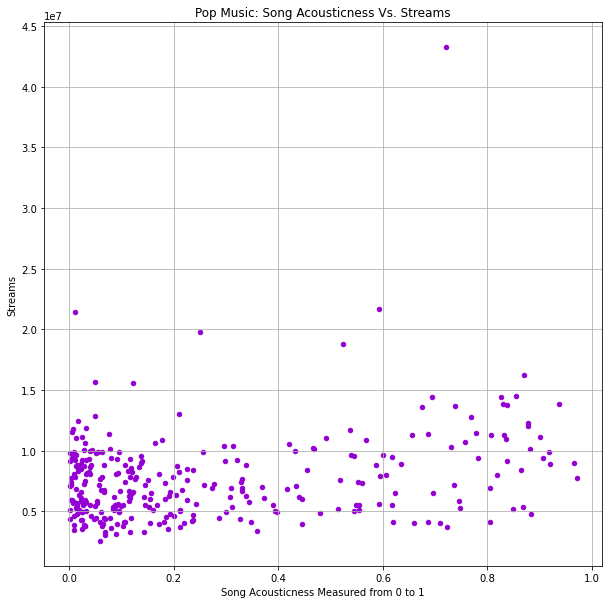

In [477]:
#Plotting Pop Music Acousticness vs. Streams


Pop_t_df.plot(kind="scatter", x="acousticness", y="streams", c="darkviolet", grid=True, figsize=(10,10),
title="Pop Music: Song Acousticness Vs. Streams", xlabel = "Song Acousticness Measured from 0 to 1", ylabel = "Streams");

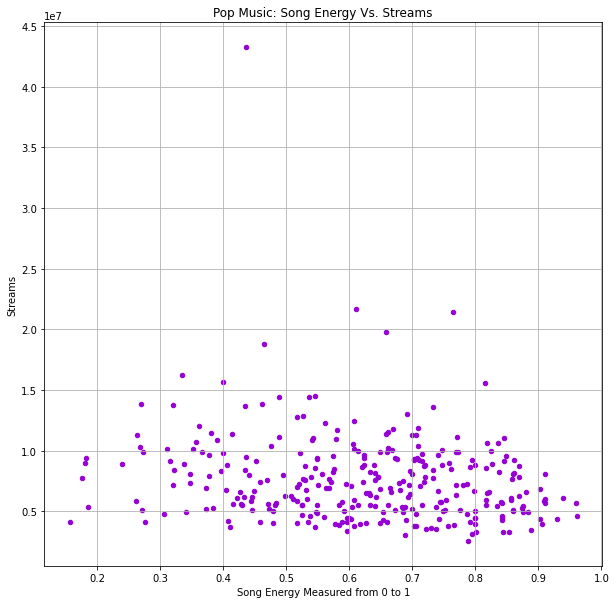

In [478]:
#Plotting Pop Music Energy vs. Streams

Pop_t_df.plot(kind="scatter", x="energy", y="streams", c="darkviolet", grid=True, figsize=(10,10),
title="Pop Music: Song Energy Vs. Streams", xlabel = "Song Energy Measured from 0 to 1", ylabel = "Streams");

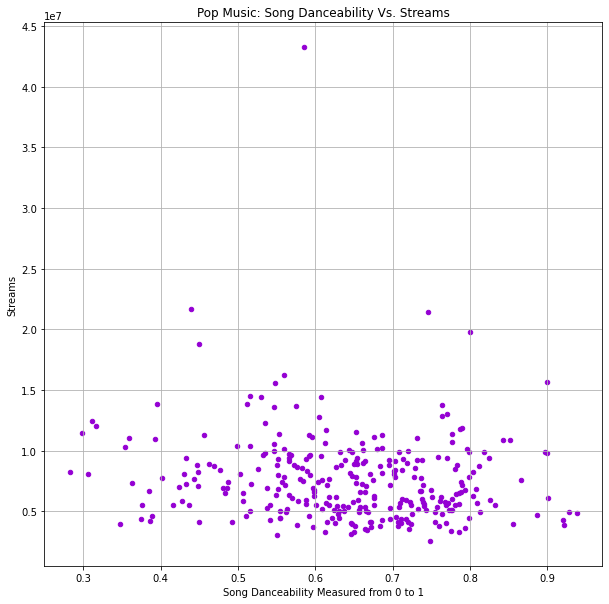

In [479]:
#Plotting Pop Music Danceability vs. Streams

Pop_t_df.plot(kind="scatter", x="danceability", y="streams", c="darkviolet", grid=True, figsize=(10,10),
title="Pop Music: Song Danceability Vs. Streams", xlabel = "Song Danceability Measured from 0 to 1", ylabel = "Streams");

In [480]:
# Setting up a Rock Database to plot

Rock_t_df = pop_data_t.loc[pop_data_t["genre_category"] == "Rock"]

Rock_t_df.head()
Rock_t_df.count()

tempo             115
genre_category    115
streams           115
duration          115
energy            115
danceability      115
liveness          115
acousticness      115
dtype: int64

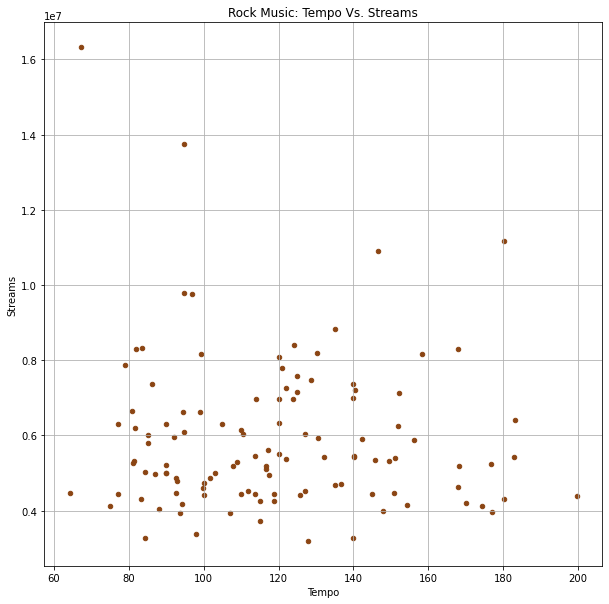

In [481]:
#Plotting Rock Music Tempo vs. Streams

Rock_t_df.plot(kind="scatter", x="tempo", y="streams", c="saddlebrown", grid=True, figsize=(10,10),
title="Rock Music: Tempo Vs. Streams", xlabel = "Tempo", ylabel = "Streams");

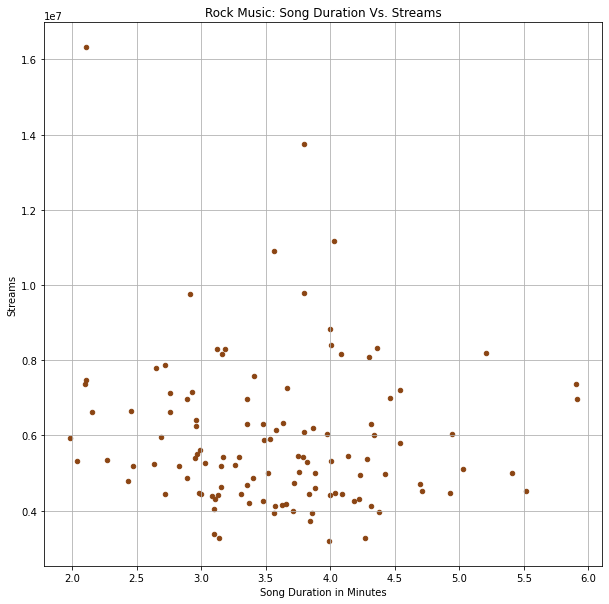

In [482]:
#Plotting Rock Music Duration vs. Streams


Rock_t_df.plot(kind="scatter", x="duration", y="streams", c="saddlebrown", grid=True, figsize=(10,10),
title="Rock Music: Song Duration Vs. Streams", xlabel = "Song Duration in Minutes", ylabel = "Streams");

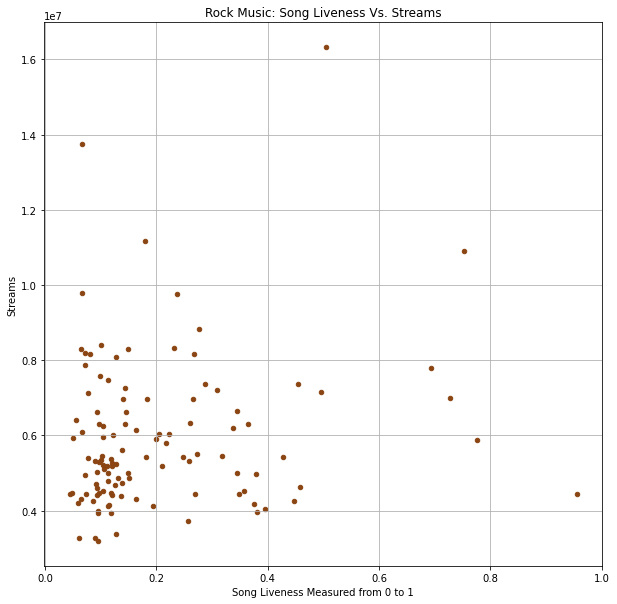

In [483]:
#Plotting Rock Music Liveness vs. Streams

Rock_t_df.plot(kind="scatter", x="liveness", y="streams", c="saddlebrown", grid=True, figsize=(10,10),
title="Rock Music: Song Liveness Vs. Streams", xlabel = "Song Liveness Measured from 0 to 1", ylabel = "Streams");

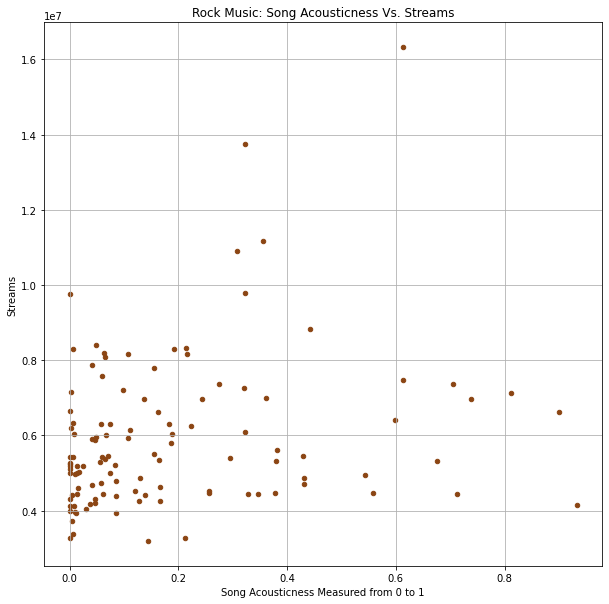

In [484]:
#Plotting Rock Music Acousticness vs. Streams


Rock_t_df.plot(kind="scatter", x="acousticness", y="streams", c="saddlebrown", grid=True, figsize=(10,10),
title="Rock Music: Song Acousticness Vs. Streams", xlabel = "Song Acousticness Measured from 0 to 1", ylabel = "Streams");

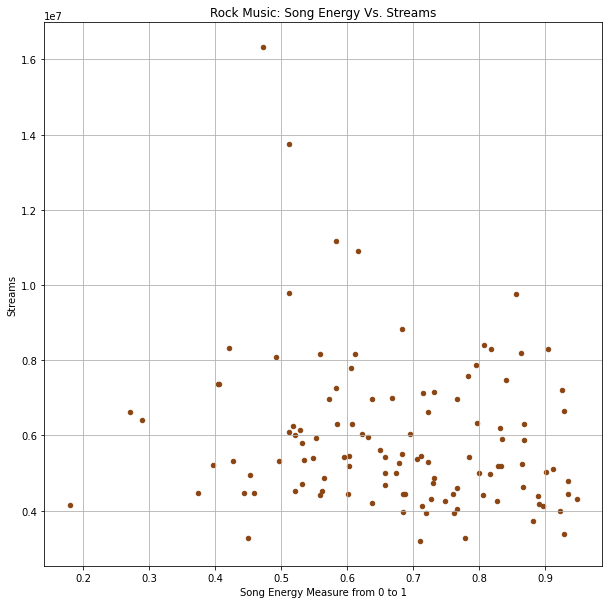

In [485]:
#Plotting Rock Music Energy vs. Streams

Rock_t_df.plot(kind="scatter", x="energy", y="streams", c="saddlebrown", grid=True, figsize=(10,10),
title="Rock Music: Song Energy Vs. Streams", xlabel = "Song Energy Measure from 0 to 1", ylabel = "Streams");

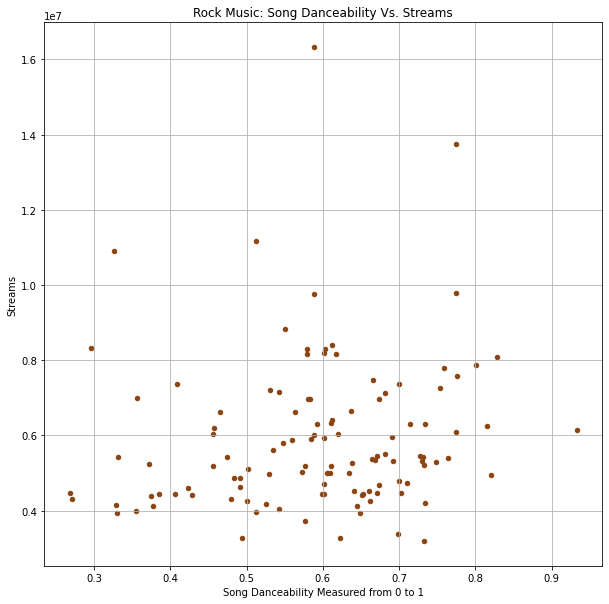

In [486]:
#Plotting Rock Music Danceability vs. Streams

Rock_t_df.plot(kind="scatter", x="danceability", y="streams", c="saddlebrown", grid=True, figsize=(10,10),
title="Rock Music: Song Danceability Vs. Streams", xlabel = "Song Danceability Measured from 0 to 1", ylabel = "Streams");

In [487]:
#Setting up an Othergenres DataFrame to plot

Othergenres_t_df = pop_data_t.loc[pop_data_t["genre_category"] == "Other"]
Othergenres_t_df.head()
Othergenres_t_df.count()

tempo             235
genre_category    235
streams           235
duration          235
energy            235
danceability      235
liveness          235
acousticness      235
dtype: int64

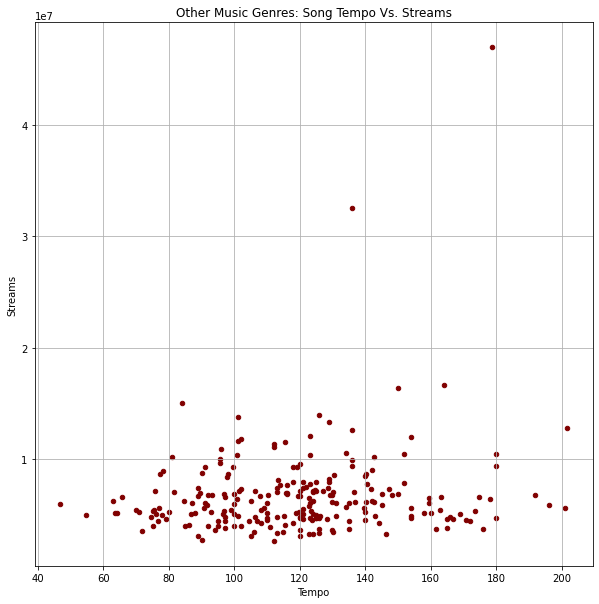

In [488]:
#Plotting Other Music Genres Tempo vs. Streams

Othergenres_t_df.plot(kind="scatter", x="tempo", y="streams", c="maroon", grid=True, figsize=(10,10),
title="Other Music Genres: Song Tempo Vs. Streams", xlabel = "Tempo", ylabel = "Streams");

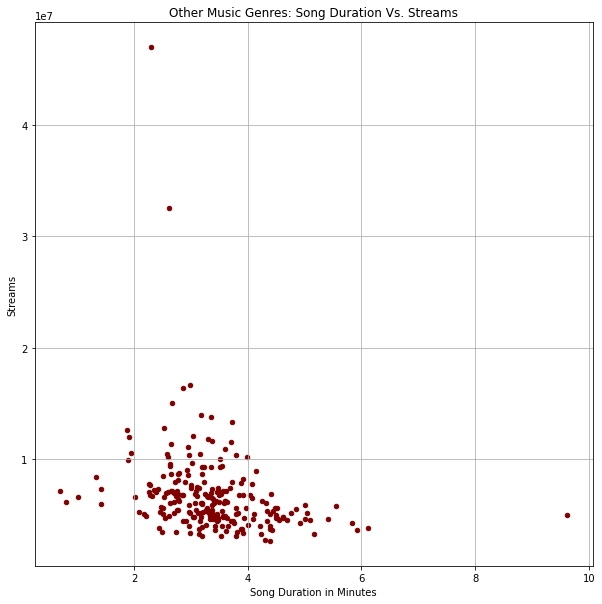

In [489]:
#Plotting Other Music Genres Song Duration vs. Streams

Othergenres_t_df.plot(kind="scatter", x="duration", y="streams", c="maroon", grid=True, figsize=(10,10),
title="Other Music Genres: Song Duration Vs. Streams", xlabel = "Song Duration in Minutes", ylabel = "Streams");

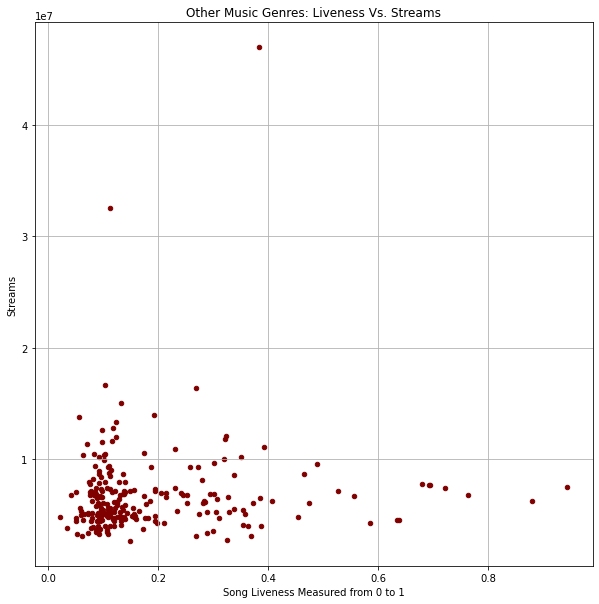

In [490]:
#Plotting Other Music Genres Liveness vs. Streams

Othergenres_t_df.plot(kind="scatter", x="liveness", y="streams", c="maroon", grid=True, figsize=(10,10),
title="Other Music Genres: Liveness Vs. Streams", xlabel = "Song Liveness Measured from 0 to 1", ylabel = "Streams");

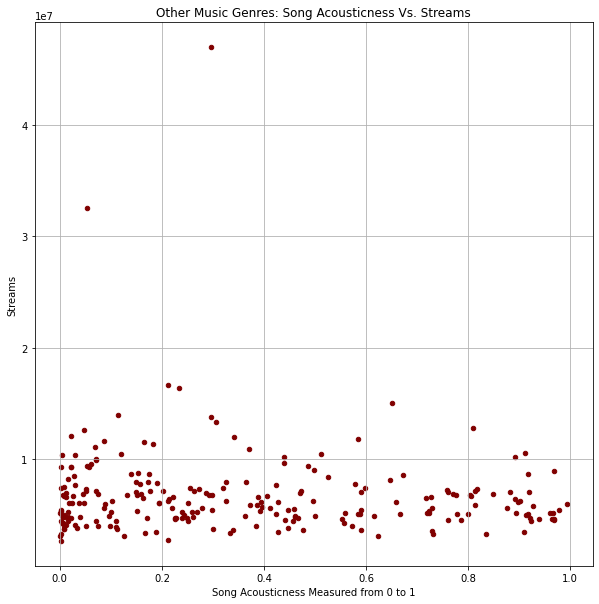

In [491]:
#Plotting Other Music Genres Song Duration vs. Streams

Othergenres_t_df.plot(kind="scatter", x="acousticness", y="streams", c="maroon", grid=True, figsize=(10,10),
title="Other Music Genres: Song Acousticness Vs. Streams", xlabel = "Song Acousticness Measured from 0 to 1", ylabel = "Streams");

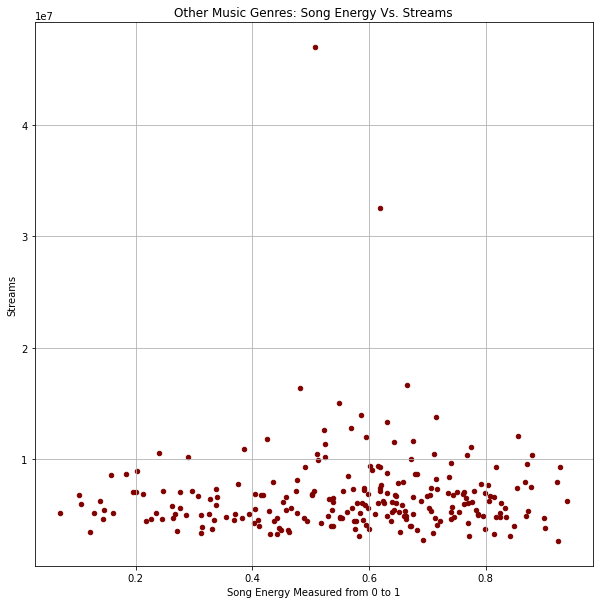

In [492]:
#Plotting Other Music Genres Energy vs. Streams

Othergenres_t_df.plot(kind="scatter", x="energy", y="streams", c="maroon", grid=True, figsize=(10,10),
title="Other Music Genres: Song Energy Vs. Streams", xlabel = "Song Energy Measured from 0 to 1", ylabel = "Streams");

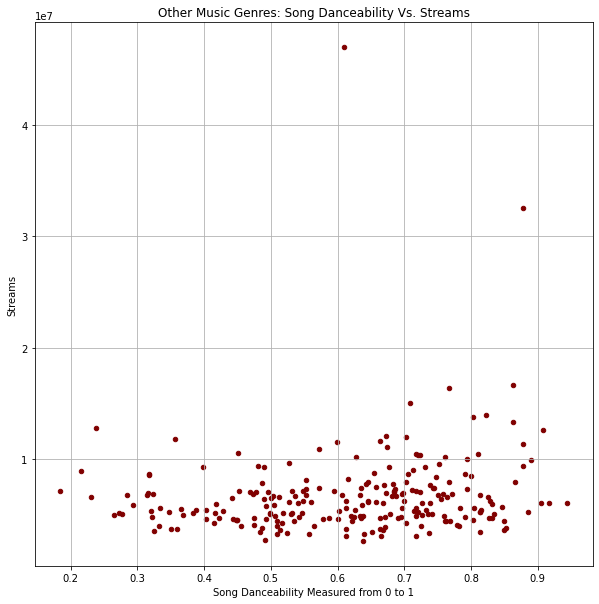

In [493]:
#Plotting Other Music Genres Danceability vs. Streams

Othergenres_t_df.plot(kind="scatter", x="danceability", y="streams", c="maroon", grid=True, figsize=(10,10),
title="Other Music Genres: Song Danceability Vs. Streams", xlabel = "Song Danceability Measured from 0 to 1", ylabel = "Streams");